In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('../data/kddcup99.csv')
display(data)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [3]:
data.label.value_counts()

label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

In [4]:
attack_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}

In [5]:
#Adding Attack Type column
data['attack_type'] = data.label.apply(lambda r:attack_types[r])
data.attack_type.value_counts()

attack_type
dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [6]:
data = data[data['attack_type'] != 'dos'].reset_index(drop=True)
data['anomaly'] = 0
data.loc[ data['attack_type'] != 'normal', 'anomaly'] = 1
data.anomaly.value_counts()

anomaly
0    97277
1     5285
Name: count, dtype: int64

In [7]:
data = data.drop(['label', 'attack_type'], axis = 1)
display(data)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,anomaly
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
102558,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
102559,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
102560,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [8]:
list_str_obj_cols = data.columns[data.dtypes == "object"].tolist()
other_cols = ['land', 'logged_in', 'is_host_login', 'is_guest_login']
list_str_obj_cols.extend(other_cols)
print(list_str_obj_cols)
for str_obj_col in list_str_obj_cols:
    data[str_obj_col] = data[str_obj_col].astype("category")
data.dtypes

['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']


duration                          int64
protocol_type                  category
service                        category
flag                           category
src_bytes                         int64
dst_bytes                         int64
land                           category
wrong_fragment                    int64
urgent                            int64
hot                               int64
num_failed_logins                 int64
logged_in                      category
lnum_compromised                  int64
lroot_shell                       int64
lsu_attempted                     int64
lnum_root                         int64
lnum_file_creations               int64
lnum_shells                       int64
lnum_access_files                 int64
lnum_outbound_cmds                int64
is_host_login                  category
is_guest_login                 category
count                             int64
srv_count                         int64
serror_rate                     float64


In [9]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
#Visualization
def bar_graph(feature):
    counts = data[feature].value_counts()
    print(counts)
    counts.plot(kind="bar")

protocol_type
tcp     80639
udp     19375
icmp     2548
Name: count, dtype: int64


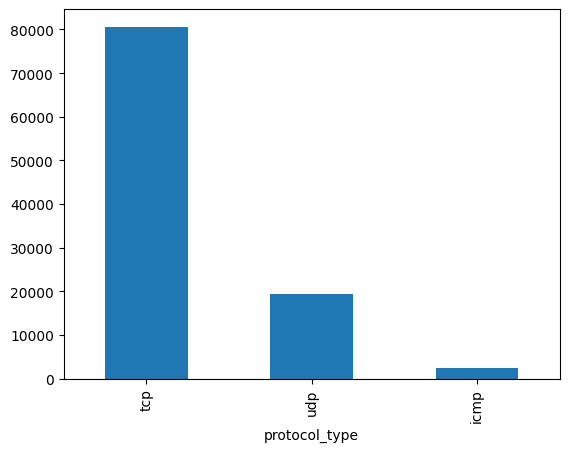

In [11]:
bar_graph('protocol_type')

In [12]:
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data['protocol_type'].to_numpy().reshape(-1, 1))
print(onehot.shape)

protocol_cols = ['tcp', 'udp']

data.drop('protocol_type', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(onehot, columns = ['protocol_type_' + s for s in protocol_cols])], axis=1)
display(data)

(102562, 2)


/Users/santhoshnarayanan/opt/anaconda3/envs/tflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,anomaly,protocol_type_tcp,protocol_type_udp
0,0,http,SF,181,5450,0,0,0,0,0,...,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0,1.0,0.0
1,0,http,SF,239,486,0,0,0,0,0,...,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0,1.0,0.0
2,0,http,SF,235,1337,0,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1.0,0.0
3,0,http,SF,219,1337,0,0,0,0,0,...,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0,1.0,0.0
4,0,http,SF,217,2032,0,0,0,0,0,...,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,0,http,SF,310,1881,0,0,0,0,0,...,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0,1.0,0.0
102558,0,http,SF,282,2286,0,0,0,0,0,...,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0,1.0,0.0
102559,0,http,SF,203,1200,0,0,0,0,0,...,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0,1.0,0.0
102560,0,http,SF,291,1200,0,0,0,0,0,...,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0,1.0,0.0


service
http           61897
smtp            9603
private         8597
other           7146
domain_u        5863
ftp_data        4551
eco_i           1642
ftp              694
urp_i            538
finger           473
ntp_u            380
ecr_i            351
telnet           315
auth             220
pop_3             84
time              54
IRC               43
urh_i             14
imap4             12
X11               11
gopher             5
vmnet              5
supdup             4
domain             4
ssh                3
rje                3
sunrpc             3
netstat            3
whois              3
link               3
csnet_ns           3
remote_job         2
tim_i              2
nntp               2
hostnames          2
uucp               2
systat             2
printer            2
login              2
mtp                2
daytime            1
courier            1
uucp_path          1
ctf                1
Z39_50             1
tftp_u             1
netbios_ns         1
efs  

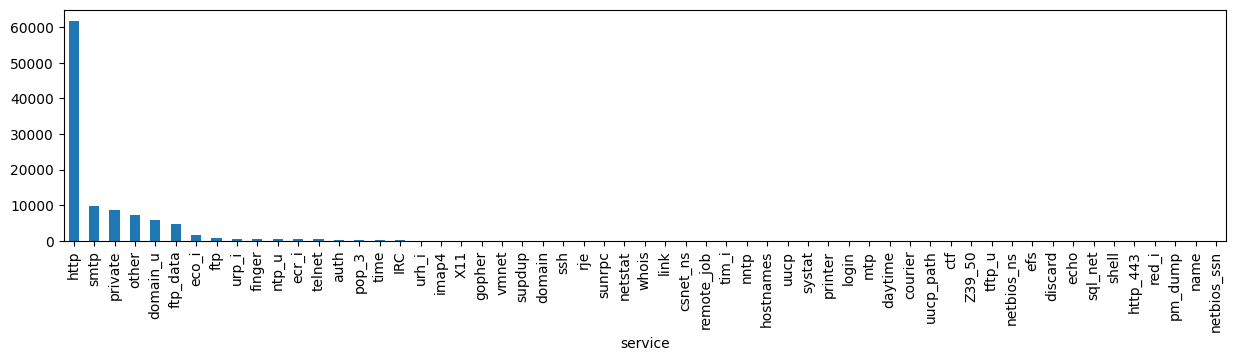

In [13]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [14]:
counts = data['service'].value_counts()
low_counts = np.where(counts < 10)
print(counts.index[low_counts].tolist())
data.loc[data['service'].isin(counts.index[low_counts].tolist()), 'service'] = 'other'
data['service'] = data['service'].astype("object").astype("category")
print(data['service'].value_counts())

['gopher', 'vmnet', 'supdup', 'domain', 'ssh', 'rje', 'sunrpc', 'netstat', 'whois', 'link', 'csnet_ns', 'remote_job', 'tim_i', 'nntp', 'hostnames', 'uucp', 'systat', 'printer', 'login', 'mtp', 'daytime', 'courier', 'uucp_path', 'ctf', 'Z39_50', 'tftp_u', 'netbios_ns', 'efs', 'discard', 'echo', 'sql_net', 'shell', 'http_443', 'red_i', 'pm_dump', 'name', 'netbios_ssn']
service
http        61897
smtp         9603
private      8597
other        7220
domain_u     5863
ftp_data     4551
eco_i        1642
ftp           694
urp_i         538
finger        473
ntp_u         380
ecr_i         351
telnet        315
auth          220
pop_3          84
time           54
IRC            43
urh_i          14
imap4          12
X11            11
Name: count, dtype: int64


In [15]:
service_cols = list(data['service'].cat.categories)
service_cols.remove('IRC')
print(service_cols)

['X11', 'auth', 'domain_u', 'eco_i', 'ecr_i', 'finger', 'ftp', 'ftp_data', 'http', 'imap4', 'ntp_u', 'other', 'pop_3', 'private', 'smtp', 'telnet', 'time', 'urh_i', 'urp_i']


In [16]:
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data['service'].to_numpy().reshape(-1, 1))
print(onehot.shape)

data.drop('service', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(onehot, columns = ['service_' + s for s in service_cols])], axis=1)
display(data)

(102562, 19)


/Users/santhoshnarayanan/opt/anaconda3/envs/tflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,service_imap4,service_ntp_u,service_other,service_pop_3,service_private,service_smtp,service_telnet,service_time,service_urh_i,service_urp_i
0,0,SF,181,5450,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,SF,239,486,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,SF,235,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,SF,219,1337,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,SF,217,2032,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,0,SF,310,1881,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102558,0,SF,282,2286,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102559,0,SF,203,1200,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102560,0,SF,291,1200,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data['service_http'].value_counts()

service_http
1.0    61897
0.0    40665
Name: count, dtype: int64

flag
SF        94301
REJ        6873
RSTR        812
S0          242
RSTO        124
SH          107
S1           55
S2           19
RSTOS0       11
S3           10
OTH           8
Name: count, dtype: int64


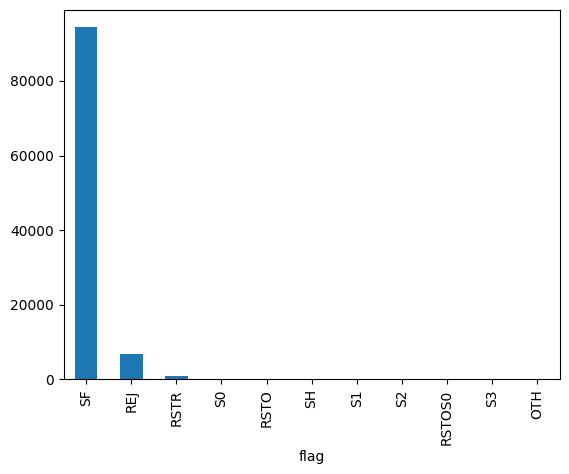

In [18]:
bar_graph('flag')

In [19]:
data['flag'].cat.categories

Index(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF',
       'SH'],
      dtype='object')

In [20]:
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data['flag'].to_numpy().reshape(-1, 1))
print(onehot.shape)

flag_cols = ['REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']

data.drop('flag', axis=1, inplace=True)
data = pd.concat([data, pd.DataFrame(onehot, columns = ['flag_' + s for s in flag_cols])], axis=1)
display(data)

(102562, 10)


/Users/santhoshnarayanan/opt/anaconda3/envs/tflow/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,0,310,1881,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102558,0,282,2286,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102559,0,203,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
102560,0,291,1200,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


land
0    102561
1         1
Name: count, dtype: int64


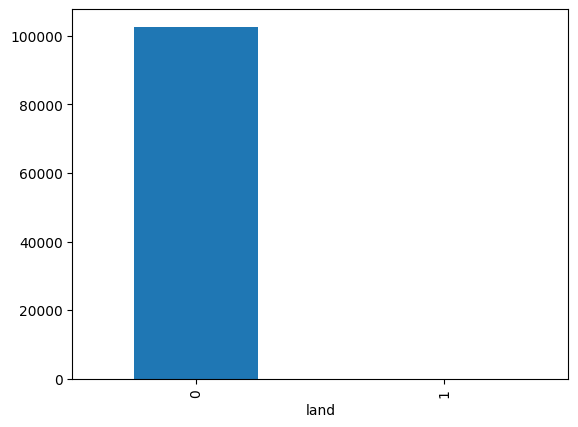

In [21]:
bar_graph('land')
to_drop = ['land']

logged_in
1    71033
0    31529
Name: count, dtype: int64


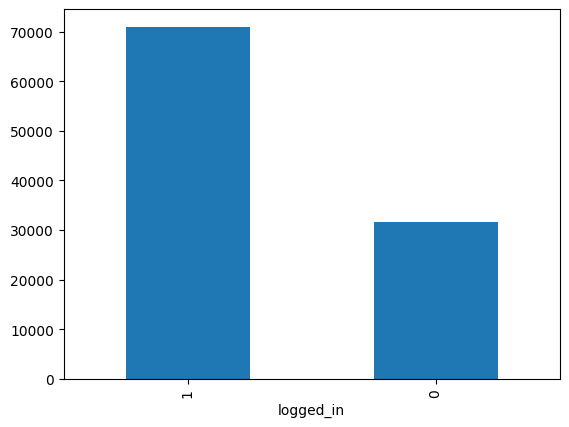

In [22]:
bar_graph('logged_in')

is_host_login
0    102562
Name: count, dtype: int64
['land', 'is_host_login']


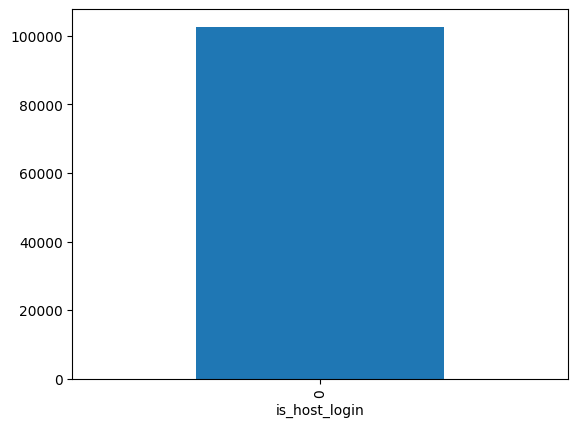

In [23]:
bar_graph('is_host_login')
to_drop.extend(['is_host_login'])
print(to_drop)

anomaly
0    97277
1     5285
Name: count, dtype: int64


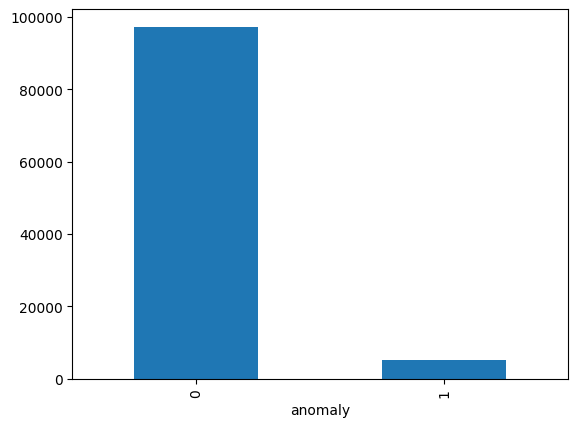

In [24]:
bar_graph('anomaly')

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,102562.0,231.104103,1.539629e+03,0.0,0.0,0.0,0.0,58329.0
src_bytes,102562.0,10844.554338,2.168840e+06,0.0,145.0,227.0,312.0,693375640.0
dst_bytes,102562.0,4006.698290,7.241809e+04,0.0,105.0,377.0,1997.0,5155468.0
wrong_fragment,102562.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0
urgent,102562.0,0.000068,1.209338e-02,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
flag_S1,102562.0,0.000536,2.315121e-02,0.0,0.0,0.0,0.0,1.0
flag_S2,102562.0,0.000185,1.360960e-02,0.0,0.0,0.0,0.0,1.0
flag_S3,102562.0,0.000098,9.873877e-03,0.0,0.0,0.0,0.0,1.0
flag_SF,102562.0,0.919454,2.721386e-01,0.0,1.0,1.0,1.0,1.0


In [26]:
print(data['wrong_fragment'].value_counts())
print(data['urgent'].value_counts())
print(data['lnum_outbound_cmds'].value_counts())

wrong_fragment
0    102562
Name: count, dtype: int64
urgent
0    102558
1         2
2         1
3         1
Name: count, dtype: int64
lnum_outbound_cmds
0    102562
Name: count, dtype: int64


In [27]:
to_drop.extend(['wrong_fragment', 'urgent', 'lnum_outbound_cmds'])
print(to_drop)

['land', 'is_host_login', 'wrong_fragment', 'urgent', 'lnum_outbound_cmds']


In [28]:
data.drop(to_drop, axis=1, inplace=True)

In [29]:
cat_columns = data.select_dtypes(['category']).columns
print(cat_columns)

data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

Index(['logged_in', 'is_guest_login'], dtype='object')


In [30]:
cols = list(data.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('anomaly')) #Remove b from list
data = data[cols+['anomaly']] #Create new dataframe with columns in the order you want
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102562 entries, 0 to 102561
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     102562 non-null  int64  
 1   src_bytes                    102562 non-null  int64  
 2   dst_bytes                    102562 non-null  int64  
 3   hot                          102562 non-null  int64  
 4   num_failed_logins            102562 non-null  int64  
 5   logged_in                    102562 non-null  int8   
 6   lnum_compromised             102562 non-null  int64  
 7   lroot_shell                  102562 non-null  int64  
 8   lsu_attempted                102562 non-null  int64  
 9   lnum_root                    102562 non-null  int64  
 10  lnum_file_creations          102562 non-null  int64  
 11  lnum_shells                  102562 non-null  int64  
 12  lnum_access_files            102562 non-null  int64  
 13 

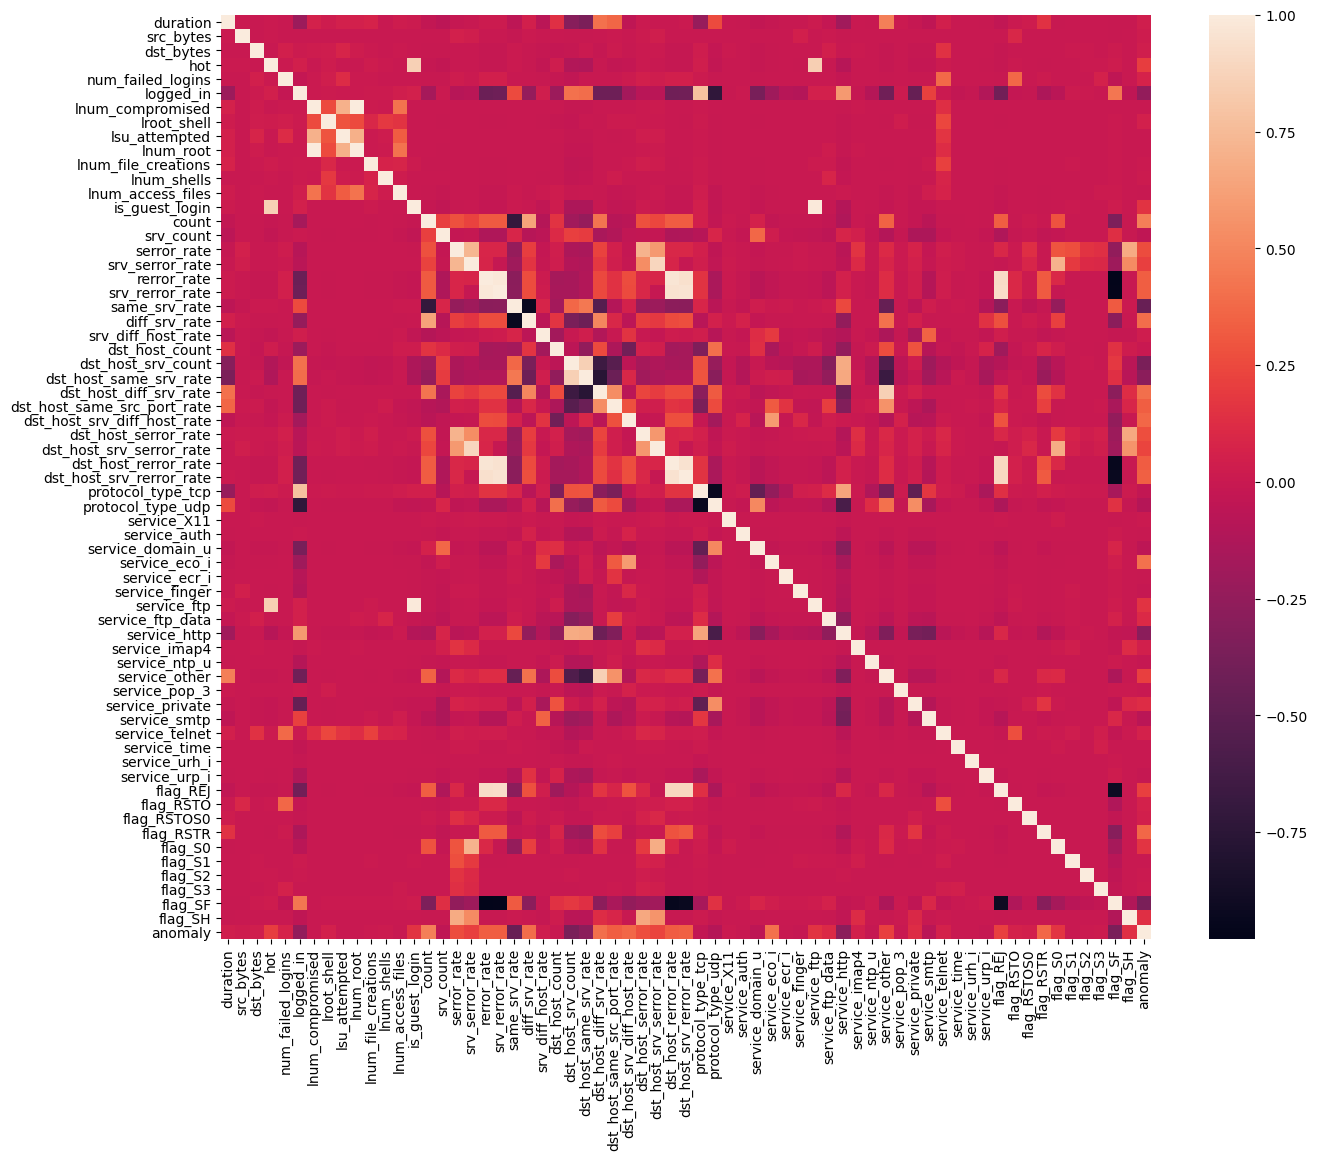

In [31]:
corr = data.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [32]:
# get upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# find features with correlation greater than 0.99
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.99)]
print(to_drop)

# drop highly correlated features
data.drop(to_drop, axis=1, inplace=True)

['lnum_root', 'service_ftp']


In [33]:
display(data)

,duration,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_file_creations,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,anomaly
0,0,181,5450,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,239,486,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0,235,1337,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,219,1337,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,217,2032,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102557,0,310,1881,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
102558,0,282,2286,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
102559,0,203,1200,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
102560,0,291,1200,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [34]:
data.to_csv('../data/all_data.csv', index = False)